> ### <div id="chap1">Introduction</div>

### FIELDS DESCRIPTION
- make: make of a car (BMW, Toyota, and so on)
- model: model of a car
- year: year when the car was manufactured
- engine_fuel_type: type of fuel the engine needs (diesel, electric, and so on)
- engine_hp: horsepower of the engine
- engine_cylinders: number of cylinders in the engine
- transmission_type: type of transmission (automatic or manual)
- driven_wheels: front, rear, all
- number_of_doors: number of doors a car has
- market_category: luxury, crossover, and so on
- vehicle_size: compact, midsize, or large
- vehicle_style: sedan or convertible
- highway_mpg: miles per gallon (mpg) on the highway
- city_mpg: miles per gallon in the city
- popularity: number of times the car was mentioned in a Twitter stream
- msrp: manufacturer’s suggested retail price

In [1]:
import pandas as pd
import numpy as np

#Visualization
from plotly.subplots import make_subplots
import pickle as pk
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Correlation
from sklearn.metrics import mutual_info_score

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# Scoring
import math
from sklearn.metrics import r2_score, mean_squared_error

### <div id="chap2">2. Data description</div>

In [2]:
df = pd.read_csv('data.csv')
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df['Year'].min()

1990

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
object_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in object_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.groupby('engine_fuel_type')['msrp'].min()

engine_fuel_type
diesel                                           2000
electric                                        22995
flex-fuel_(premium_unleaded_recommended/e85)    28900
flex-fuel_(premium_unleaded_required/e85)       62600
flex-fuel_(unleaded/e85)                         2055
flex-fuel_(unleaded/natural_gas)                37535
natural_gas                                     26740
premium_unleaded_(recommended)                  15990
premium_unleaded_(required)                     17085
regular_unleaded                                 2000
Name: msrp, dtype: int64

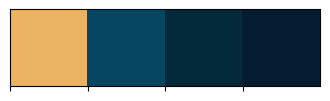

In [7]:
colors = ['#ECB365','#064663','#04293A',"#041C32"]
sns.palplot(colors)

## EXPLORATORY DATA ANALYSIS

#### MEAN PRICE PER YEAR

In [8]:
index = df.groupby(['year']).mean()['msrp'].index.tolist()
mean_per_year = df.groupby(['year']).mean()['msrp'].values.tolist()
std_per_year = df.groupby(['year']).std()['msrp'].values.tolist()

df_mean_price = pd.DataFrame(np.column_stack((mean_per_year,std_per_year)), columns=['mean','std'] ,index=index)
fig = go.Figure()
fig.add_trace(go.Scatter(x=index,y=df_mean_price['mean'],
                         mode='markers', name='Mean Price', marker={'color':colors[0]}))
fig.add_trace(go.Scatter(x=index,y=df_mean_price['std'],
                         mode='markers', name='Std Price', marker={'color':colors[1]}))

reference_line = go.Scatter(x=[1988, df['year'].max()],
                            y=[20000, 20000],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title='Mean Price per Year',
                  xaxis_title='Year',
                  yaxis_title='std',
                  paper_bgcolor="LightSteelBlue")
fig.show()

### MEAN PRICE PER BRAND

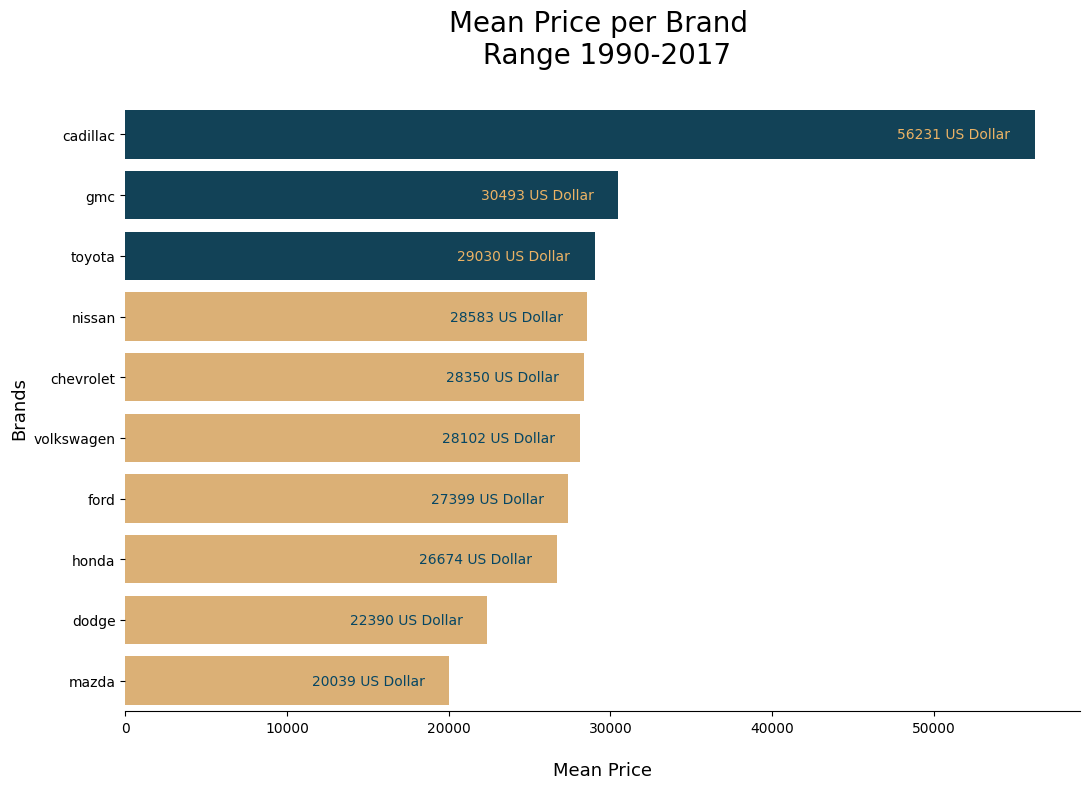

In [9]:
df_make_id = df.loc[df['make'].isin(df['make'].value_counts().head(10).index)]
make_id_price = df_make_id.groupby('make')['msrp'].mean().round(0)\
.astype('float64').sort_values(ascending=False)
fig,axs = plt.subplots(1,1,figsize=(11,8))
set_colors = [colors[1] if x in [56231.0,30493.0,29030.0] else colors[0] for x in make_id_price.values]
fig = sns.barplot(data=pd.DataFrame(make_id_price).transpose(), orient = 'h', palette=set_colors)
fig.set_title('Mean Price per Brand \n Range 1990-2017\n ', fontsize = 20)
fig.set_ylabel('Brands', fontsize = 13)
fig.set_xlabel('\nMean Price', fontsize = 13)
fig.set_yticklabels(fig.get_yticklabels(), rotation=0)

# Set the width and hight of annotation
for p in fig.patches:
    width = p.get_width()
    if width in [56231.0,30493.0,29030.0]:
        clr = colors[0]
    else:
        clr = colors[1]
    plt.text(-5000+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:.0f}'.format(width) + ' US Dollar',color=clr,
             ha='center', va='center', fontsize = 'medium')
    
sns.despine(right=True,top = True, left = True)
plt.tight_layout()
plt.show();

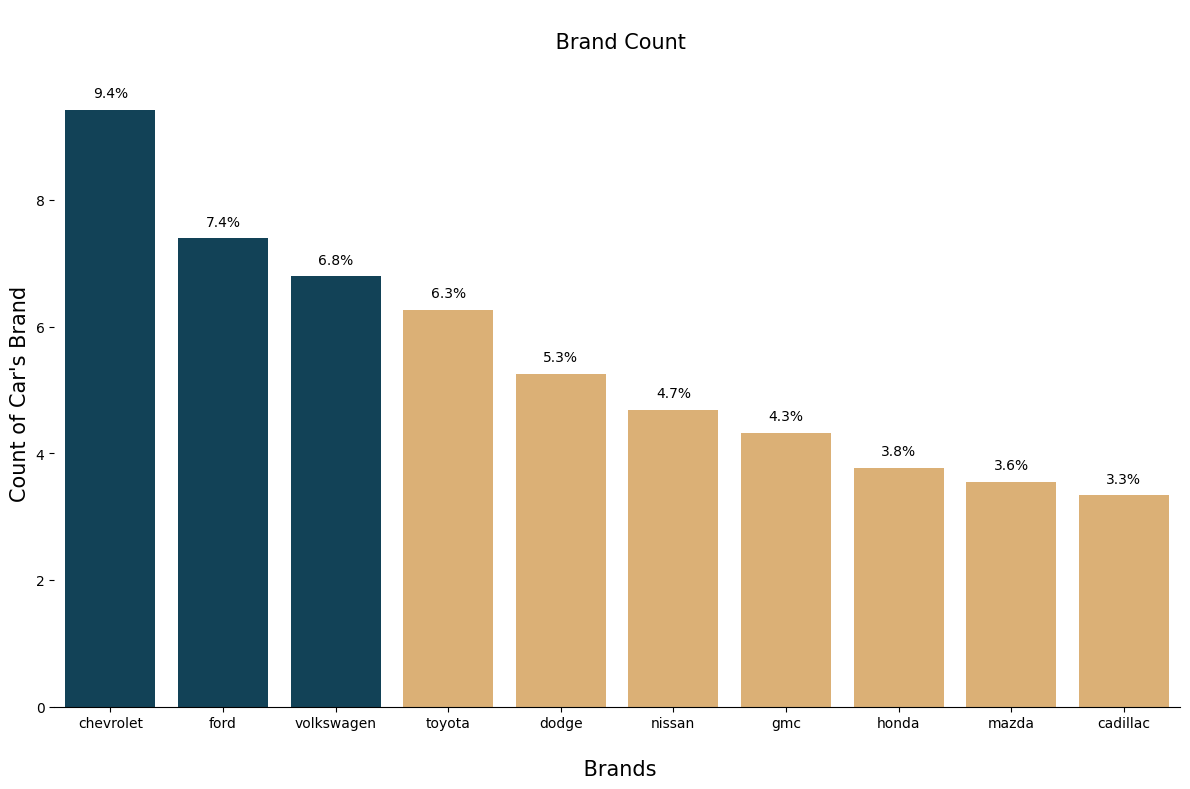

In [10]:
fig,axs = plt.subplots(1,1,figsize=(12,8))

fig=sns.barplot(x=df['make'].value_counts().head(10).index,\
                  y=df['make'].value_counts().head(10).values*100/len(df['make']),\
                  data=df, orient = 'v',
                 palette = [colors[1],colors[1],colors[1], colors[0],colors[0],colors[0],\
                            colors[0],colors[0],colors[0],colors[0]], ax = axs)
fig.set_title('\n Brand Count\n', fontsize=15)
fig.set_ylabel("Count of Car's Brand", fontsize=15)
fig.set_xlabel('\n Brands', fontsize=15)
fig.set_xticklabels(fig.get_xticklabels(), rotation=0)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.01f') + "%",(p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points', )
    
sns.despine(right=True,top = True, left = True)
plt.tight_layout()
plt.show();

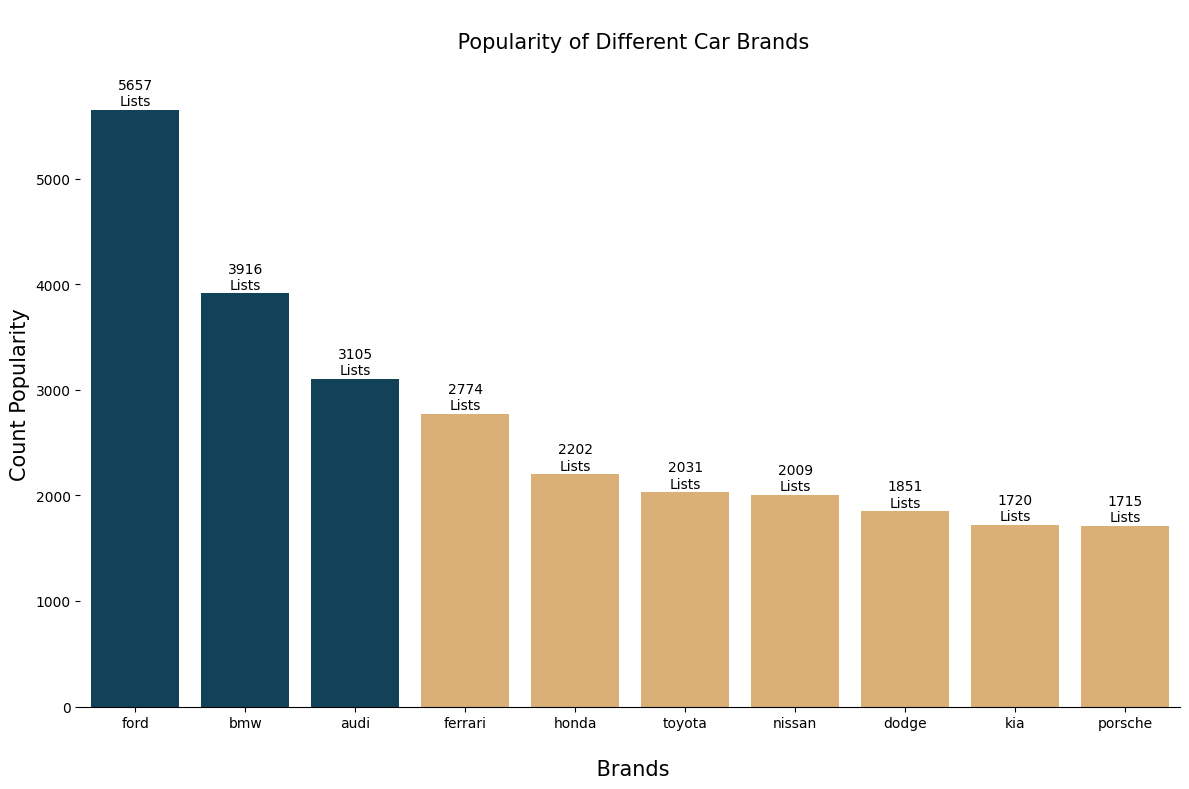

In [11]:
fig,axs = plt.subplots(1,1,figsize=(12,8))
x = df.groupby('make')['popularity'].mean().sort_values(ascending=False).head(10).index
y = df.groupby('make')['popularity'].mean().sort_values(ascending=False).head(10).values

fig=sns.barplot(x=x,\
                  y=y,\
                  data=df, orient = 'v',
                 palette = [colors[1],colors[1],colors[1], colors[0],colors[0],colors[0],\
                            colors[0],colors[0],colors[0],colors[0]], ax = axs)
fig.set_title('\n Popularity of Different Car Brands\n', fontsize=15)
fig.set_ylabel("Count Popularity", fontsize=15)
fig.set_xlabel('\n Brands', fontsize=15)
fig.set_xticklabels(fig.get_xticklabels(), rotation=0)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f') + "\nLists",(p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points', )
    
sns.despine(right=True,top = True, left = True)
plt.tight_layout()
plt.show();

### ENGINE FUEL TYPE PROPORTION

In [12]:
df.engine_fuel_type.value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [13]:
# Group categories (unleaded, flex-fuel, diesel, electric, natural gas)
df.loc[df['engine_fuel_type']=='regular_unleaded','engine_fuel_type'] = 'unleaded'
df.loc[df['engine_fuel_type']=='premium_unleaded_(required)','engine_fuel_type'] = 'unleaded'
df.loc[df['engine_fuel_type']=='premium_unleaded_(recommended)','engine_fuel_type'] = 'unleaded'

df.loc[df['engine_fuel_type']=='flex-fuel_(unleaded/e85)','engine_fuel_type'] = 'flex_fuel'
df.loc[df['engine_fuel_type']=='flex-fuel_(premium_unleaded_required/e85)','engine_fuel_type'] = 'flex_fuel'
df.loc[df['engine_fuel_type']=='flex-fuel_(premium_unleaded_recommended/e85)','engine_fuel_type'] = 'flex_fuel'
df.loc[df['engine_fuel_type']=='flex-fuel_(unleaded/natural_gas)','engine_fuel_type'] = 'flex_fuel'

eng = df.loc[~df['year'].isin([2015,2016,2017]),'engine_fuel_type'].value_counts()
eng2 = df.loc[df['year'].isin([2015,2016,2017]),'engine_fuel_type'].value_counts()

print('From last three years: \n')
print(eng, '\n')
print('From 1990 to 2014: \n')
print(eng2)

# Proportion before 2015
prop_eng_ft = pd.DataFrame({'Engine Fuel Type' : eng.index,
                            'Proportion': (eng/sum(eng)).tolist()})

# Proportion after 2015
prop_eng_ft2 = pd.DataFrame({'Engine Fuel Type' : eng2.index,
                            'Proportion': (eng2/sum(eng2)).tolist()})

From last three years: 

unleaded     5531
flex_fuel     325
diesel         45
electric       15
Name: engine_fuel_type, dtype: int64 

From 1990 to 2014: 

unleaded       5173
flex_fuel       660
diesel          109
electric         51
natural_gas       2
Name: engine_fuel_type, dtype: int64


In [14]:
prop_eng_ft2

,Engine Fuel Type,Proportion
0,unleaded,0.862886
1,flex_fuel,0.110092
2,diesel,0.018182
3,electric,0.008507
4,natural_gas,0.000334


In [15]:
# Plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=prop_eng_ft['Engine Fuel Type'],
    y=prop_eng_ft['Proportion'],
    name='Proportion of cars per fuel type before 2015',
    marker={'color':colors[1]}
))

fig.add_trace(go.Bar(
    x=prop_eng_ft2['Engine Fuel Type'],
    y=prop_eng_ft2['Proportion'],
    name='Proportion of engine fuel type after 2015',
    marker={'color':colors[0]}
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title_text='Proportion of engine fuel type')

fig.show()

### Numerical Column Outliers & Distribution

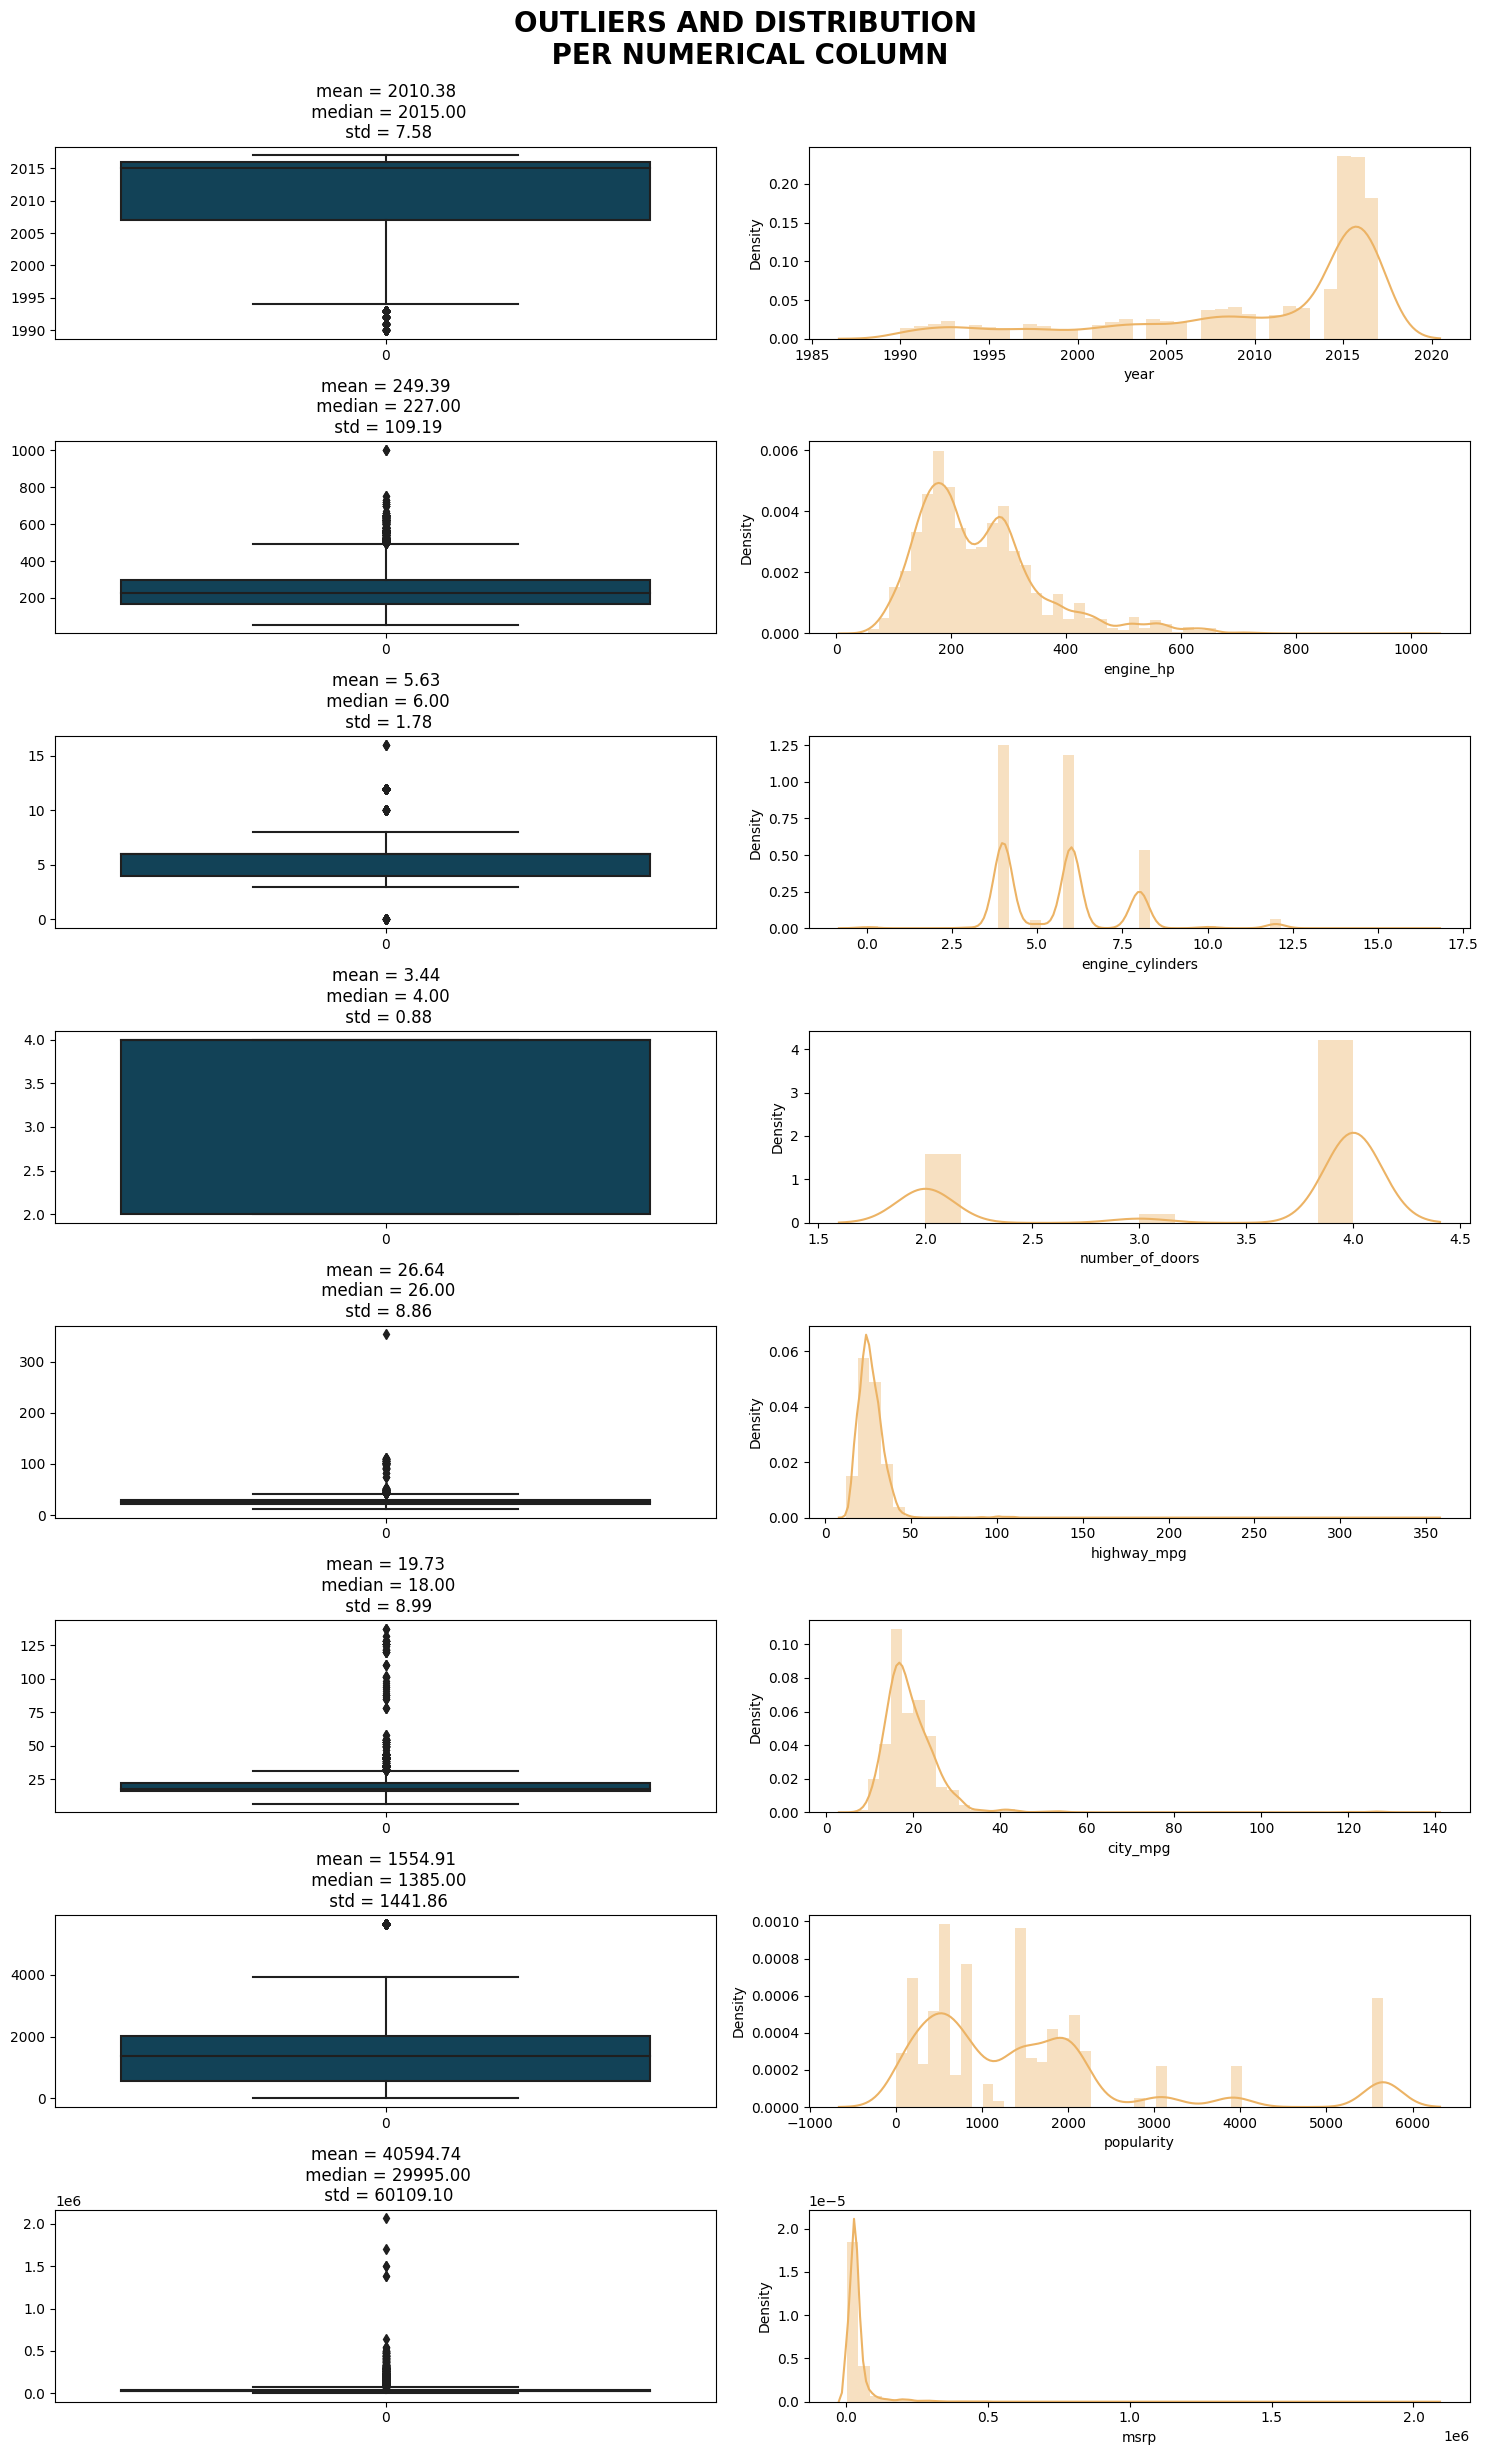

In [16]:
# Make a function to create plots
def create_plot(columns):
    fig, axs = plt.subplots(8, 2, figsize=(15, 25))
    plt.suptitle('OUTLIERS AND DISTRIBUTION\n PER NUMERICAL COLUMN\n', fontweight = 'bold', fontsize=20)
    for i, col in enumerate(columns):
        sns.boxplot(df[col], ax = axs[i][0], color=colors[1])
        sns.distplot(df[col], ax = axs[i][1],color=colors[0])
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    #plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Call create_plot function
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
create_plot(numerical_columns)

In [17]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
del_cat = ['make','market_category','model']
for x in categorical_columns:
    for a in del_cat:
        if a in x:
            categorical_columns.remove(a)

# TARGET VARIABLE ANALYSIS

#### TARGET VARIABLE

In [18]:
# Filtering
below_5k_per_year_mean = df.loc[df['msrp']<5000].groupby(['year']).mean()['msrp']
below_5k_per_year_count = df.loc[df['msrp']<5000].groupby(['year']).count()['msrp']

In [19]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=below_5k_per_year_mean.index, 
               y=below_5k_per_year_mean, 
               name="Mean MSRP per year",
               marker_color=colors[0]),
    secondary_y=True,
)

fig.add_trace(go.Bar(
    x=below_5k_per_year_count.index,
    y=below_5k_per_year_count,
    name='Count cars per year',
    marker_color=colors[1]
))

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Count</b> cars", secondary_y=False)
fig.update_yaxes(title_text="<b>Mean MSRP</b> (in USD)", secondary_y=True)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45,
                  title_text='Age of less than 5k USD sold cars')

fig.show()

# CHECKING MISSING VALUES

In [20]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes != 'object'].index)

In [21]:
prn_nan_categ = round((100*df[categorical].isna().sum()/len(df.index)),2)
prn_nan_num = round(100*(df[numerical].isna().sum()/len(df.index)),2)

In [22]:
nan_data_numerical = prn_nan_num.sort_values(ascending=False).to_frame()
nan_data_categorical = prn_nan_categ.sort_values(ascending=False).to_frame()

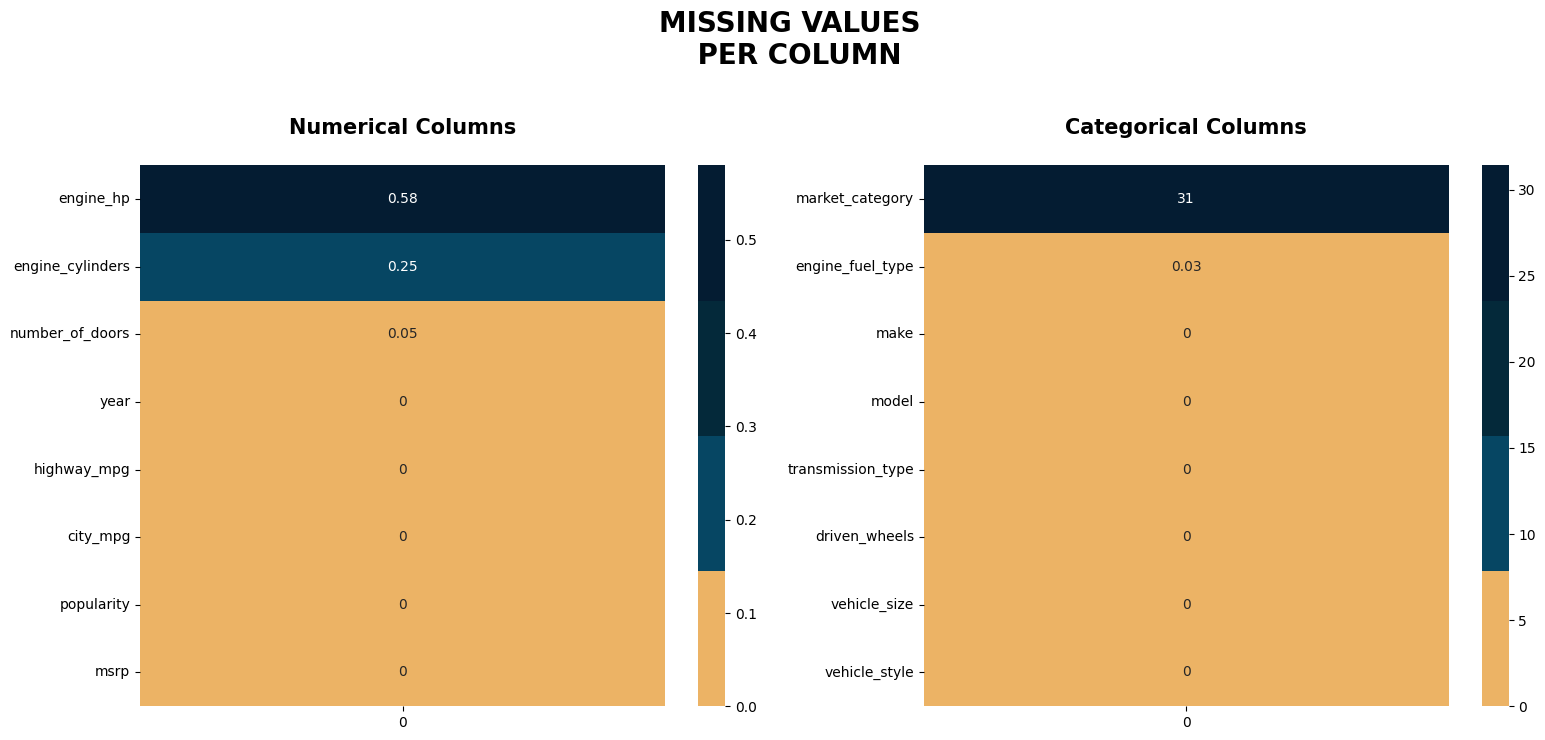

In [23]:
fig, axs = plt.subplots(1,2, figsize = (16,7.5))
plt1 = sns.heatmap(nan_data_numerical,annot=True,cmap=colors, ax=axs[0])
plt2 = sns.heatmap(nan_data_categorical,annot=True,cmap=colors, ax=axs[1])
axs[0].set_title('Numerical Columns\n', fontweight = 'bold',fontsize=15)
axs[1].set_title('Categorical Columns\n', fontweight = 'bold',fontsize=15)
plt.suptitle('MISSING VALUES \n PER COLUMN\n', fontweight = 'bold', fontsize=20)
plt.tight_layout()

## DATA CLEANING

In [24]:
col_nan_num = ['engine_hp','engine_cylinders','number_of_doors']
col_nan_cat = ['market_category','engine_fuel_type']

In [25]:
col_nan_num = ['engine_hp','engine_cylinders','number_of_doors']
col_nan_cat = ['market_category','engine_fuel_type']
def imputer(df, columns,kind):
    for col in columns:
        if kind == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
imputer(df,col_nan_num,'mean')
imputer(df,col_nan_cat,'mode')

print(f'col_nan_num: \n{df[col_nan_num].isna().sum()}')
print('---'*10)
print(f'col_nan_cat: \n{df[col_nan_cat].isna().sum()}')

col_nan_num: 
engine_hp           0
engine_cylinders    0
number_of_doors     0
dtype: int64
------------------------------
col_nan_cat: 
market_category     0
engine_fuel_type    0
dtype: int64


In [26]:
s1 = df.shape
clean = df[['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'msrp']]
for i in clean.columns:
    qt1 = df[i].quantile(0.25)
    qt3 = df[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = df[df[i]<lower].index
    max_in = df[df[i]>upper].index
    df.drop(min_in, inplace = True)
    df.drop(max_in, inplace = True)
s2 = df.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  1409


In [27]:
df.to_csv('car_cleaned.csv',index=False)
df_cleaned = pd.read_csv('car_cleaned.csv')

## CORRELATION BETWEEN FEATURE AND TARGET VARIABLE

### CATEGORICAL FEATURE VS TARGET CORRELATION

In [28]:
def calculate_mi(series):
    return mutual_info_score(series, df_cleaned['msrp'])

In [29]:
df_mi = df_cleaned[categorical].apply(calculate_mi).sort_values(ascending=False)

In [30]:
df_mi

model                5.172066
make                 2.479319
market_category      1.728411
vehicle_style        1.611419
driven_wheels        0.872534
vehicle_size         0.692006
transmission_type    0.485382
engine_fuel_type     0.268814
dtype: float64

### NUMERICAL FEATURE VS TARGET CORRELATION

In [31]:
df_PEARSON = df_cleaned[numerical].corrwith(df_cleaned['msrp']).sort_values(ascending=False)
df_PEARSON

msrp                1.000000
engine_hp           0.739358
year                0.708701
engine_cylinders    0.293932
number_of_doors     0.221458
popularity          0.030325
highway_mpg        -0.033046
city_mpg           -0.100068
dtype: float64

### PREPROCESSING

In [32]:
cars_data = df_cleaned.copy()
cat_features = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style','market_category']
cars_data = pd.get_dummies(cars_data, columns = cat_features)

In [33]:
X = cars_data.drop('msrp', axis = 1)
y = cars_data['msrp']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.8, random_state = 1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(8404, 871)
(8404,)
(1050, 871)
(1050,)
(1051, 871)
(1051,)


(None, None)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid= sc.fit_transform(X_valid)

## MODELLING

### DATA TESTING

In [35]:
rfr = RandomForestRegressor(n_estimators = 40)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(X_train, y_train)
rfr_pred_test = rfr_algo.predict(X_test)

print('R2 Score is : ', r2_score(y_test, rfr_pred_test))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, rfr_pred_test)))

R2 Score is :  0.95904940932551
Mean squared error is :  3191.3621411240424


<Axes: xlabel='msrp', ylabel='Predicted Value'>

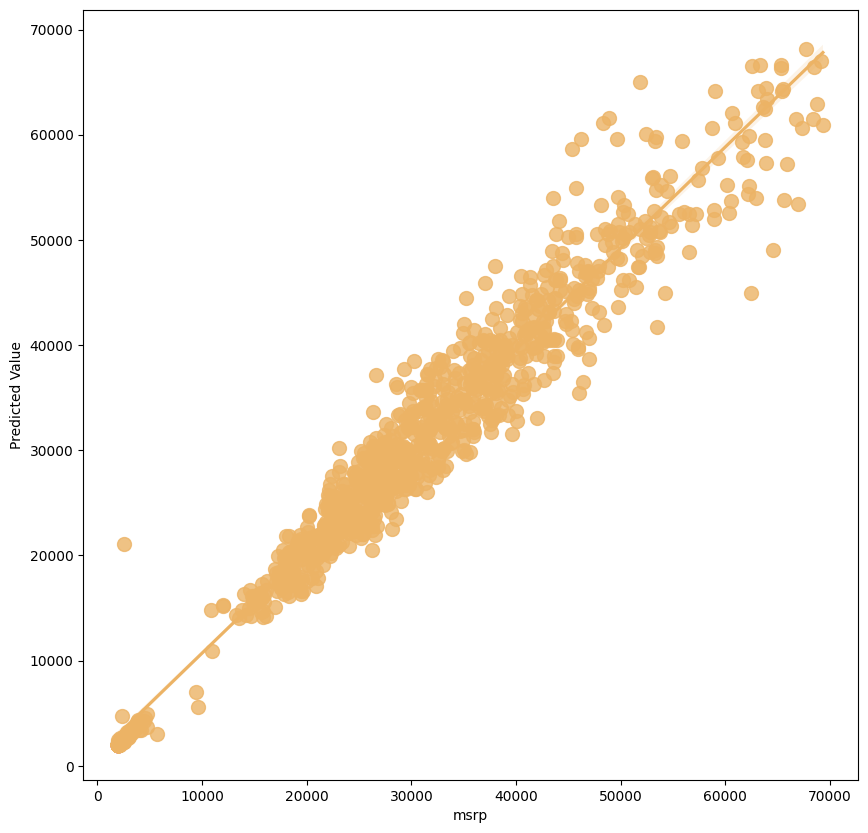

In [36]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(data=cars_data,x=y_test,y=rfr_pred_test, fit_reg=True,scatter_kws={"s": 100},color=colors[0],)

### DATA VALIDATION

In [37]:
rfr_pred_val = rfr_algo.predict(X_valid)

print('R2 Score is : ', r2_score(y_valid, rfr_pred_val))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_valid, rfr_pred_val)))

R2 Score is :  0.9521537583471332
Mean squared error is :  3427.070140983807


<Axes: xlabel='msrp', ylabel='Predicted Value'>

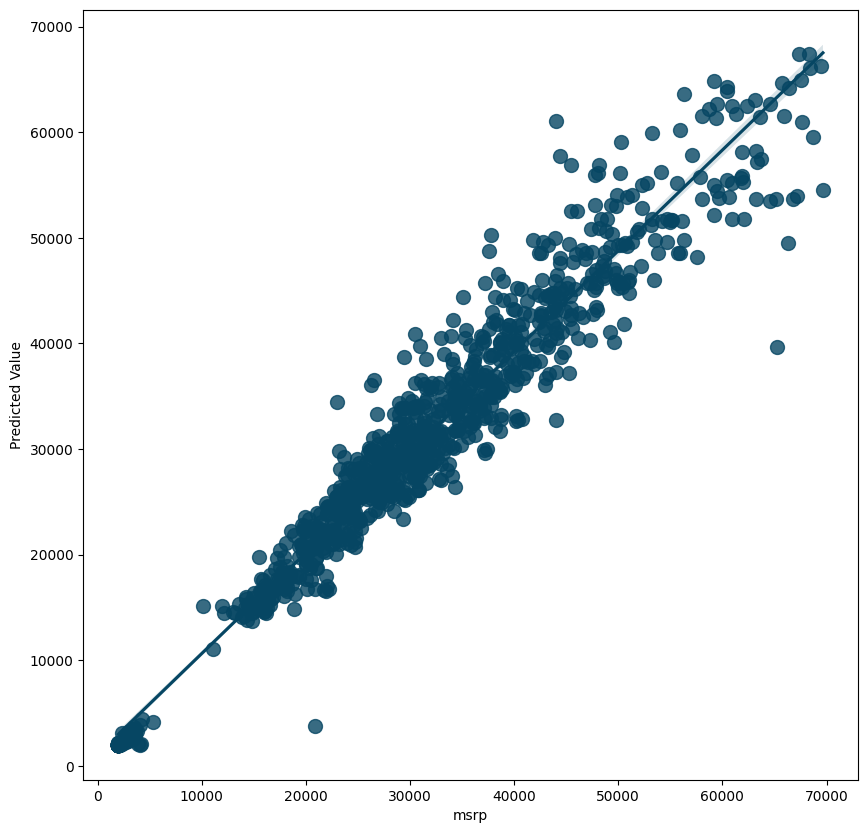

In [38]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(data=cars_data,x=y_valid,y=rfr_pred_val, fit_reg=True,scatter_kws={"s": 100}, color=colors[1])

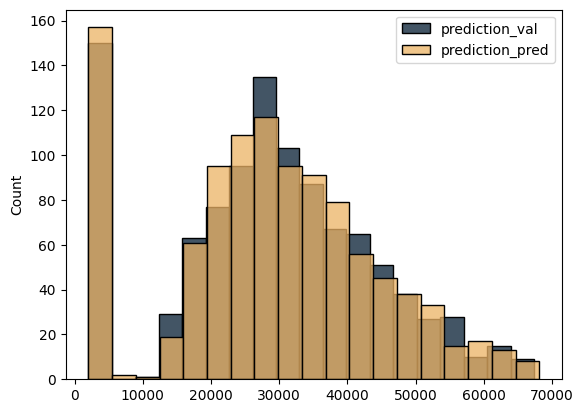

In [39]:
sns.histplot(rfr_pred_val, label='prediction_val', color=colors[3])
sns.histplot(rfr_pred_test, label='prediction_pred',color=colors[0])
plt.legend()

In [40]:
with open('car_price_prediction.bin', 'wb') as f_out:
    pk.dump((sc, rfr_algo, y_test,rfr_pred_test,y_valid,rfr_pred_val), f_out)

In [41]:
with open('car_price_prediction.bin', 'rb') as f_in:
    sc, rf, y_test,rfr_pred_test,y_valid,rfr_pred_val = pk.load(f_in)

In [42]:
data_test = pd.read_csv('data_sample.csv')

In [43]:
data_test.columns = data_test.columns.str.lower().str.replace(' ','_')
object_columns = list(data_test.dtypes[data_test.dtypes == 'object'].index)

for col in object_columns:
    data_test[col] = data_test[col].str.lower().str.replace(' ', '_')

In [44]:
df2 = df_cleaned.copy()
df2 = df2.drop('msrp', axis=1)

In [45]:
cat_features = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style','market_category']
data_test = pd.concat([data_test,df2], axis=0)
cars_data = pd.get_dummies(data_test, columns = cat_features)
X_testing= sc.fit_transform(cars_data)

In [46]:
X_testing = X_testing[0].reshape(1, -1)

In [47]:
pred = rf.predict(X_testing)

In [56]:
print(pred[0])

46298.75
